In [1]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("kashishparmar02/social-media-sentiments-analysis-dataset")

files = os.listdir(path)
df = pd.read_csv(path + "/" + files[0])
df.head()

100%|██████████| 50.9k/50.9k [00:00<00:00, 33.9MB/s]

Extracting files...


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


# Data Preparation

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [3]:
df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], inplace=True, axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Timestamp  732 non-null    object 
 3   User       732 non-null    object 
 4   Platform   732 non-null    object 
 5   Hashtags   732 non-null    object 
 6   Retweets   732 non-null    float64
 7   Likes      732 non-null    float64
 8   Country    732 non-null    object 
 9   Year       732 non-null    int64  
 10  Month      732 non-null    int64  
 11  Day        732 non-null    int64  
 12  Hour       732 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 74.5+ KB


In [5]:
df.isnull().sum()

,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0
Country,0
Year,0


In [6]:
df.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [7]:
df.tail()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20
731,Organizing a virtual talent show during challe...,Happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15


#### Text Preprocessing

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)  # Join tokens back into a string

df['Text'] = df['Text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [9]:
df.isnull().sum()

,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0
Country,0
Year,0


In [10]:
df.Text

,Text
0,enjoying beautiful day park
1,traffic terrible morning
2,finished amazing workout
3,excited upcoming weekend getaway
4,trying new recipe dinner tonight
...,...
727,collaborating science project received recogni...
728,attending surprise birthday party organized fr...
729,successfully fundraising school charity initia...
730,participating multicultural festival celebrati...


In [11]:
df.Platform.value_counts()

,count
Platform,
Instagram,258
Facebook,231
Twitter,128
Twitter,115


In [12]:
df.Year.value_counts()

,count
Year,
2023,289
2019,73
2020,69
2021,63
2022,63
2018,56
2017,43
2016,38
2015,19


In [13]:
df.Likes.sort_values(ascending=False)

,Likes
481,80.0
530,80.0
382,80.0
560,80.0
470,80.0
...,...
197,15.0
175,15.0
172,15.0
1,10.0


# Sentiment Analysis

### Lexicon-Based Sentiment Analysis

#### Using VADER for Sentiment Analysis
VADER (Valence Aware Dictionary and sEntiment Reasoner) provides a polarity score (-1 to 1) for text.

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df['Sentiment_Score'] = df['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

def classify_sentiment(score):
  if score >= 0.05:
    return 'Positive'
  elif score <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

df['Predicted_Sentiment'] = df['Sentiment_Score'].apply(classify_sentiment)

print(df[['Text', 'Sentiment_Score', 'Predicted_Sentiment']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                               Text  Sentiment_Score Predicted_Sentiment
0       enjoying beautiful day park           0.8074            Positive
1          traffic terrible morning          -0.4767            Negative
2          finished amazing workout           0.5859            Positive
3  excited upcoming weekend getaway           0.3400            Positive
4  trying new recipe dinner tonight           0.0000             Neutral


### Using TextBlob for Sentiment Analysis
TextBlob calculates sentiment polarity and subjectivity.

In [15]:
from textblob import TextBlob

df['Sentiment_Polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Predicted_Sentiment1'] = df['Sentiment_Polarity'].apply(lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral'))

print(df[['Text', 'Sentiment_Polarity', 'Predicted_Sentiment1']].head())

                               Text  Sentiment_Polarity Predicted_Sentiment1
0       enjoying beautiful day park            0.675000             Positive
1          traffic terrible morning           -1.000000             Negative
2          finished amazing workout            0.600000             Positive
3  excited upcoming weekend getaway            0.375000             Positive
4  trying new recipe dinner tonight            0.136364             Positive


In [16]:
df['Predicted_Sentiment'].value_counts()

,count
Predicted_Sentiment,
Positive,459
Negative,189
Neutral,84


In [17]:
df['Predicted_Sentiment1'].value_counts()

,count
Predicted_Sentiment1,
Neutral,401
Positive,245
Negative,86


In [18]:
df[['Text', 'Sentiment', 'Sentiment_Polarity', 'Predicted_Sentiment']]

,Text,Sentiment,Sentiment_Polarity,Predicted_Sentiment
0,enjoying beautiful day park,Positive,0.675000,Positive
1,traffic terrible morning,Negative,-1.000000,Negative
2,finished amazing workout,Positive,0.600000,Positive
3,excited upcoming weekend getaway,Positive,0.375000,Positive
4,trying new recipe dinner tonight,Neutral,0.136364,Neutral
...,...,...,...,...
727,collaborating science project received recogni...,Happy,0.500000,Positive
728,attending surprise birthday party organized fr...,Happy,0.600000,Positive
729,successfully fundraising school charity initia...,Happy,0.516667,Positive
730,participating multicultural festival celebrati...,Happy,1.000000,Positive


In [19]:
df[['Text', 'Sentiment', 'Sentiment_Polarity', 'Predicted_Sentiment1']]

,Text,Sentiment,Sentiment_Polarity,Predicted_Sentiment1
0,enjoying beautiful day park,Positive,0.675000,Positive
1,traffic terrible morning,Negative,-1.000000,Negative
2,finished amazing workout,Positive,0.600000,Positive
3,excited upcoming weekend getaway,Positive,0.375000,Positive
4,trying new recipe dinner tonight,Neutral,0.136364,Positive
...,...,...,...,...
727,collaborating science project received recogni...,Happy,0.500000,Positive
728,attending surprise birthday party organized fr...,Happy,0.600000,Positive
729,successfully fundraising school charity initia...,Happy,0.516667,Positive
730,participating multicultural festival celebrati...,Happy,1.000000,Positive


In [20]:
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Neutral,14
Contentment,14
...,...
Adrenaline,1
Harmony,1
ArtisticBurst,1


## Machine Learning-Based Sentiment Analysis
Build a text classification model to predict sentiments.

#### Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sentiment_Label'] = le.fit_transform(df['Sentiment'])

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['Text'])
y = df['Sentiment_Label']

#### Model Training

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.11564625850340136

In [24]:
classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         2\n           3       0.00      0.00      0.00         1\n           5       0.00      0.00      0.00         1\n           9       0.00      0.00      0.00         1\n          12       0.00      0.00      0.00         1\n          15       0.00      0.00      0.00         1\n          17       0.00      0.00      0.00         1\n          22       0.00      0.00      0.00         3\n          24       0.00      0.00      0.00         1\n          26       0.00      0.00      0.00         1\n          28       0.00      0.00      0.00         1\n          29       0.00      0.00      0.00         2\n          30       0.00      0.00      0.00         1\n          31       0.00      0.00      0.00         1\n          32       0.00      0.00      0.00         1\n          33       0.00      0.00      0.00         1\n          35       0.00      0.00      0.00         1\n       

In [25]:
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Neutral,14
Contentment,14
...,...
Adrenaline,1
Harmony,1
ArtisticBurst,1


#### Applying Resampling Techniques: (to increase model accuracy)
* Oversampling: Increasing the minority class samples using RandomOverSampler.
* Undersampling: Reducing the majority class samples to balance the data

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

In [49]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [27]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9890065146579805

In [29]:
model.score(X_test, y_test)

0.9890065146579805

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test))

array([[13,  0,  0, ...,  0,  0,  0],
       [ 0,  6,  0, ...,  0,  0,  0],
       [ 0,  0,  7, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  7,  0,  0],
       [ 0,  0,  0, ...,  0, 13,  0],
       [ 0,  0,  0, ...,  0,  0,  9]])

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.99063518 0.9910387  0.99063136 0.99063136 0.99144603]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

                        precision    recall  f1-score   support

         Acceptance          0.93      1.00      0.96        13
      Acceptance             1.00      1.00      1.00         6
       Accomplishment        1.00      1.00      1.00         7
           Admiration        1.00      1.00      1.00         9
         Admiration          1.00      1.00      1.00        11
        Admiration           1.00      1.00      1.00         7
         Adoration           1.00      1.00      1.00         6
       Adrenaline            1.00      1.00      1.00        10
            Adventure        1.00      1.00      1.00         8
         Affection           1.00      1.00      1.00        12
            Amazement        1.00      1.00      1.00        10
          Ambivalence        1.00      1.00      1.00         9
      Ambivalence            1.00      1.00      1.00         7
         Amusement           1.00      1.00      1.00         7
        Amusement            1.00      

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solvers for smaller datasets
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'solver': 'liblinear'}


In [34]:
model = LogisticRegression(C= 10, solver= 'liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9922638436482085

In [50]:
import joblib

joblib.dump(model, 'sentiment_analysis_model.pkl')

['vectorizer.pkl']

In [51]:
model = joblib.load('sentiment_analysis_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

In [53]:
test_texts = ["The product is great", "Terrible service", "Average experience"]

test_vectors = vectorizer.transform(test_texts)

predictions = model.predict(test_vectors)

cleaned_predictions = [label.strip() for label in predictions]

print(cleaned_predictions)

['Joy', 'Negative', 'Bitter']


### Random Forest

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.991042345276873

### Gradient Boosting (XGBoost):

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler

le = LabelEncoder()
df['Sentiment_Label'] = le.fit_transform(df['Sentiment'])

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['Text'])
y = df['Sentiment_Label']

ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [57]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [58]:
accuracy_score(y_test, y_pred)

0.9881921824104235

## Temporal Analysis

In [ ]:
df.Timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 732 entries, 0 to 731
Series name: Timestamp
Non-Null Count  Dtype 
--------------  ----- 
732 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [ ]:
df.Timestamp.head()

,Timestamp
0,2023-01-15 12:30:00
1,2023-01-15 08:45:00
2,2023-01-15 15:45:00
3,2023-01-15 18:20:00
4,2023-01-15 19:55:00


In [ ]:
df.Timestamp = pd.to_datetime(df.Timestamp)
df.Year = df.Timestamp.dt.year
df.Month = df.Timestamp.dt.month
Day = df.Timestamp.dt.day
Hour = df.Timestamp.dt.hour

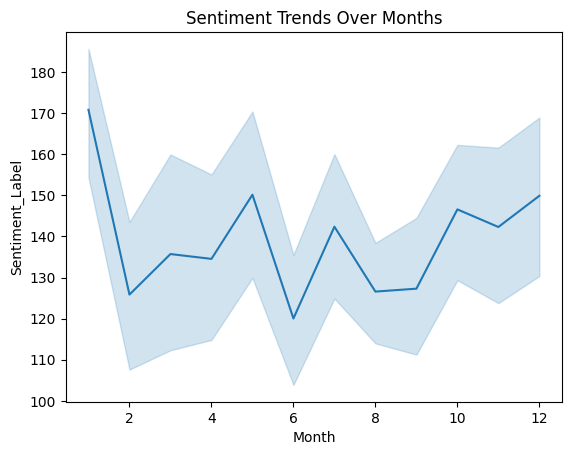

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=df.Month, y=df['Sentiment_Label'])
plt.title("Sentiment Trends Over Months")
plt.show()

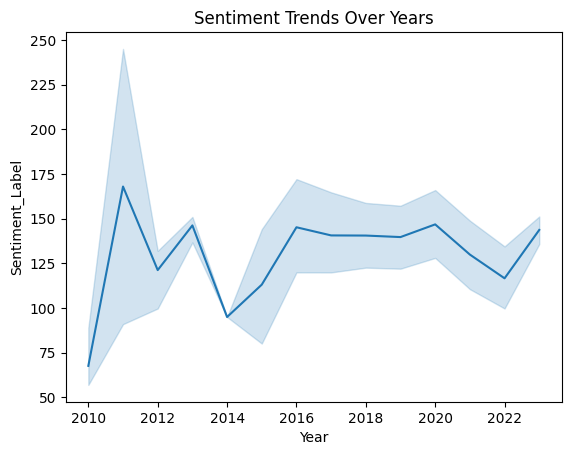

In [ ]:
sns.lineplot(x=df.Year, y=df.Sentiment_Label)
plt.title("Sentiment Trends Over Years")
plt.show()

### User Behavior Insights

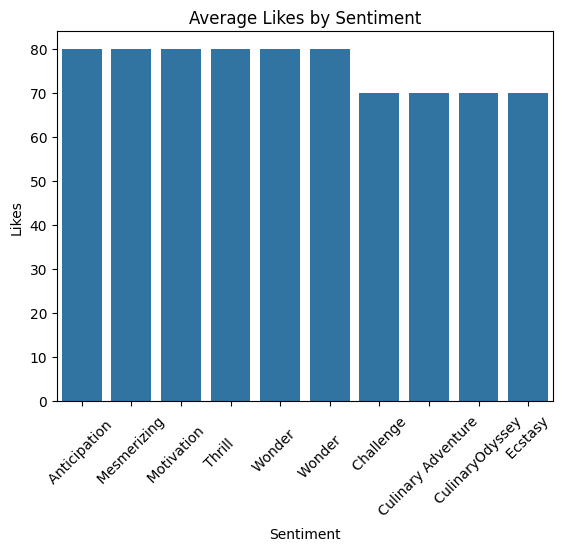

In [ ]:
popular_posts = df.groupby('Sentiment')[['Likes', 'Retweets']].mean().reset_index().sort_values(by=['Likes', 'Retweets'], ascending=False).head(10)

sns.barplot(x='Sentiment', y='Likes', data=popular_posts)
plt.title("Average Likes by Sentiment")
plt.xticks(rotation=45)
plt.show()

### Platform-Specific Analysis

In [ ]:
df['Platform'] = df['Platform'].apply(lambda x: x.strip())

df['Platform'].unique()

array(['twitter', 'instagram', 'facebook'], dtype=object)

In [ ]:
df['Platform'].value_counts()

,count
Platform,
instagram,258
twitter,243
facebook,231


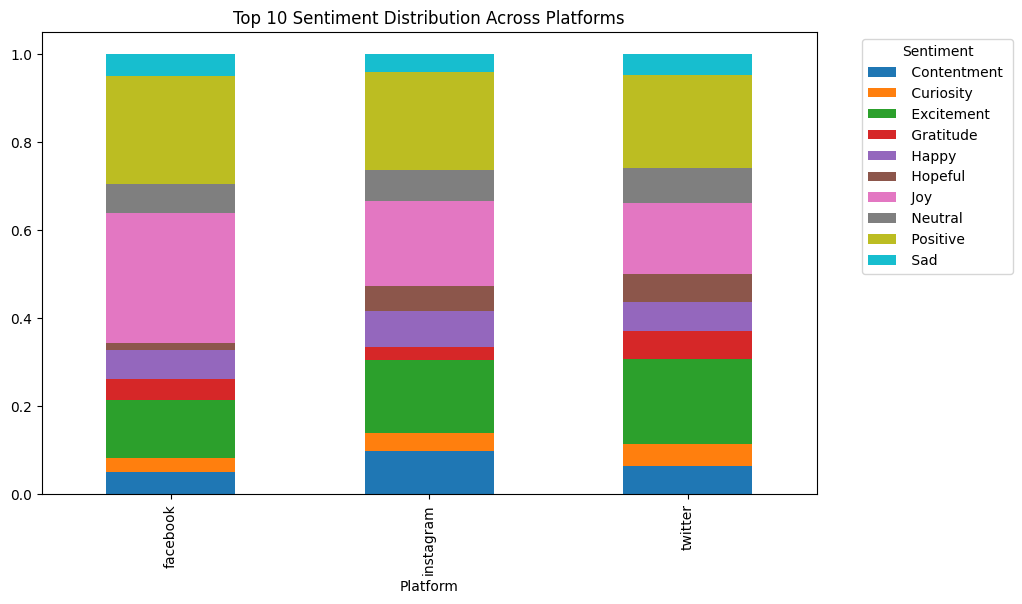

In [ ]:
sentiment_totals = df['Sentiment'].value_counts().sort_values(ascending=False).head(10)

top_sentiments_df = df[df['Sentiment'].isin(sentiment_totals.index)]

platform_sentiment = top_sentiments_df.groupby('Platform')['Sentiment'].value_counts(normalize=True).unstack()
platform_sentiment.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Top 10 Sentiment Distribution Across Platforms")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Hashtag Trends

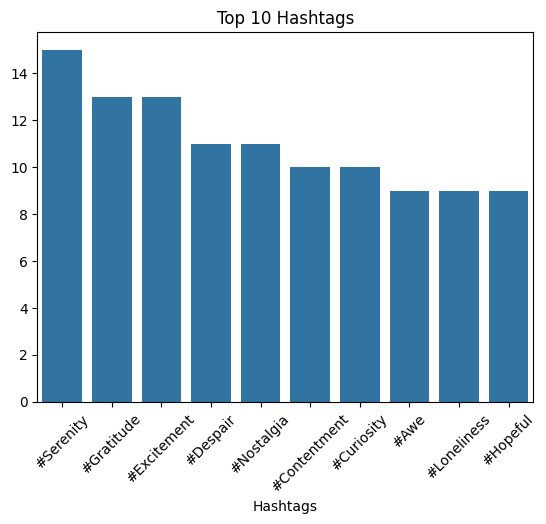

In [ ]:
hashtags = df['Hashtags'].str.split(' ').explode()
top_hashtags = hashtags.value_counts().head(11)[1:]

sns.barplot(x=top_hashtags.index, y=top_hashtags.values)
plt.title("Top 10 Hashtags")
plt.xticks(rotation=45)
plt.show()

### Geographical Analysis

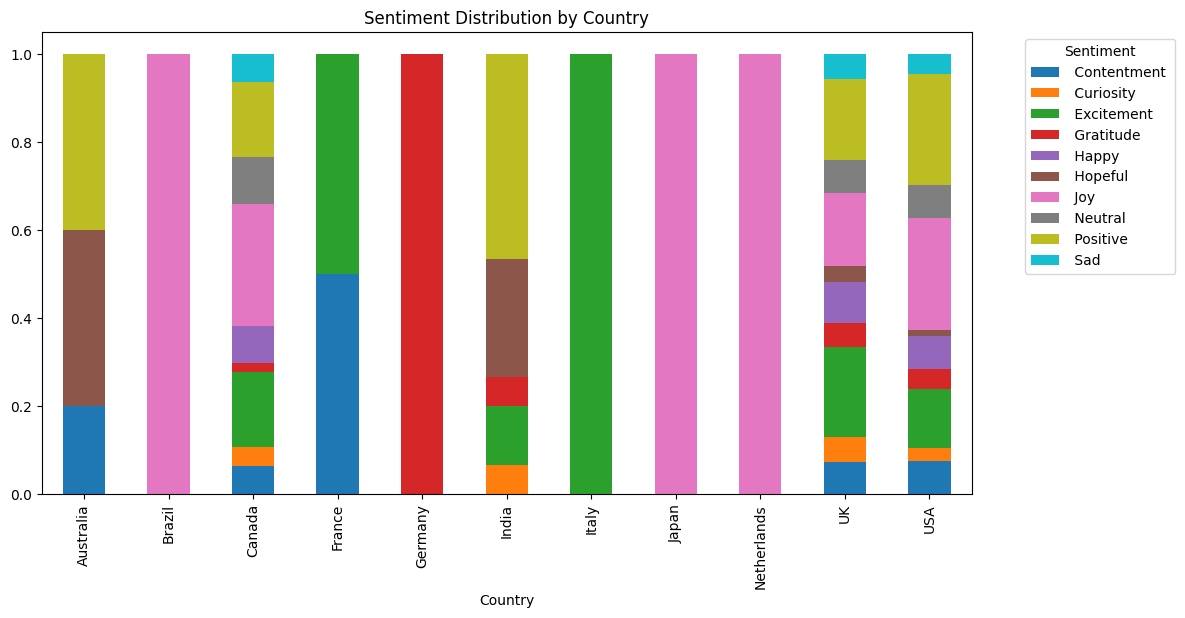

In [ ]:
df['Country'] = df['Country'].apply(lambda x: x.strip())

country_sentiment = top_sentiments_df.groupby('Country')['Sentiment'].value_counts(normalize=True).unstack()
country_sentiment.plot(kind='bar', figsize=(12,6), stacked=True)
plt.title("Sentiment Distribution by Country")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### User Identification

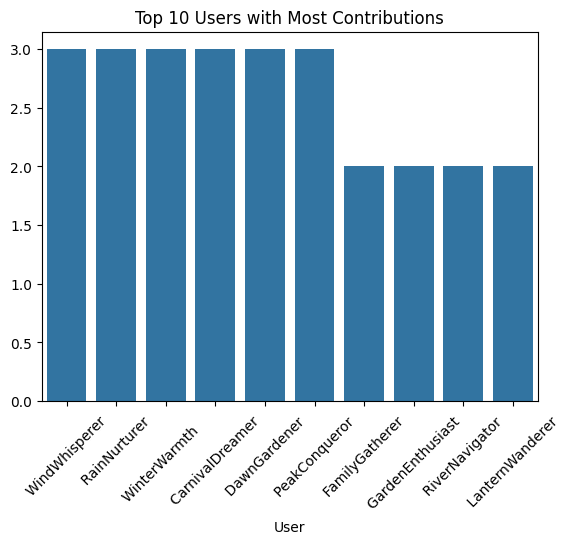

In [ ]:
top_users = df.User.value_counts().head(10)
sns.barplot(x=top_users.index, y=top_users.values)
plt.title("Top 10 Users with Most Contributions")
plt.xticks(rotation=45)
plt.show()

### Cross-Feature Analysis

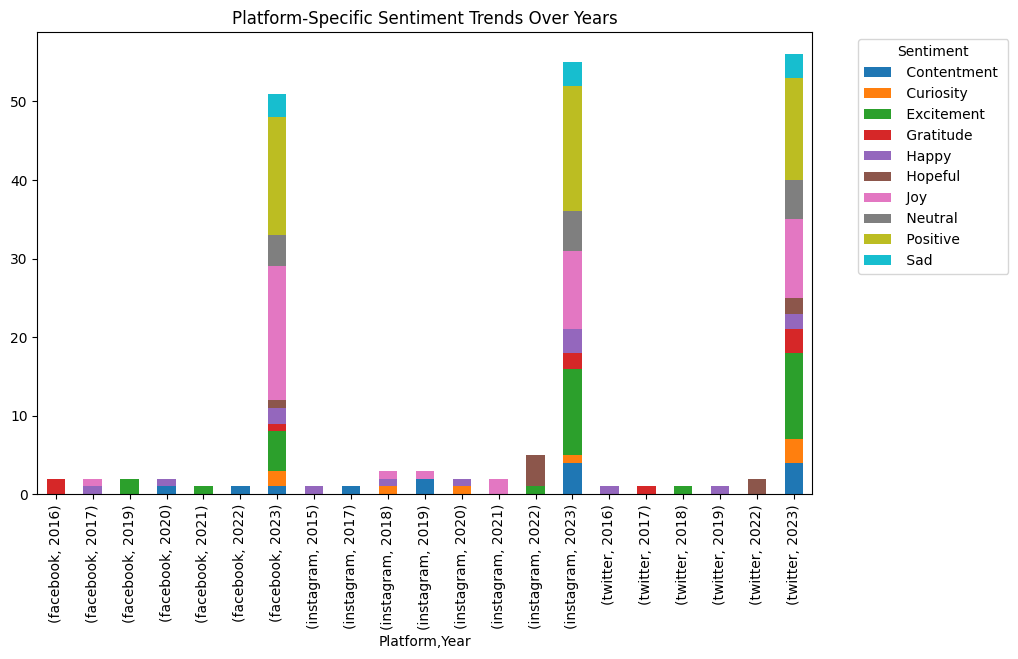

In [ ]:
cross_analysis = top_sentiments_df.groupby(['Platform', 'Year'])[['Sentiment']].value_counts().unstack()

cross_analysis.plot(kind='bar', figsize=(10,6), stacked=True)
plt.title("Platform-Specific Sentiment Trends Over Years")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
df.groupby(['Platform', 'Country']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)

,Platform,Country,Count
40,instagram,USA,72
17,facebook,USA,60
56,twitter,USA,56
39,instagram,UK,53
55,twitter,UK,48
44,twitter,Canada,46
21,instagram,Canada,45
3,facebook,Canada,44
16,facebook,UK,42
49,twitter,India,31


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df['Sentiment_Score'] = df['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


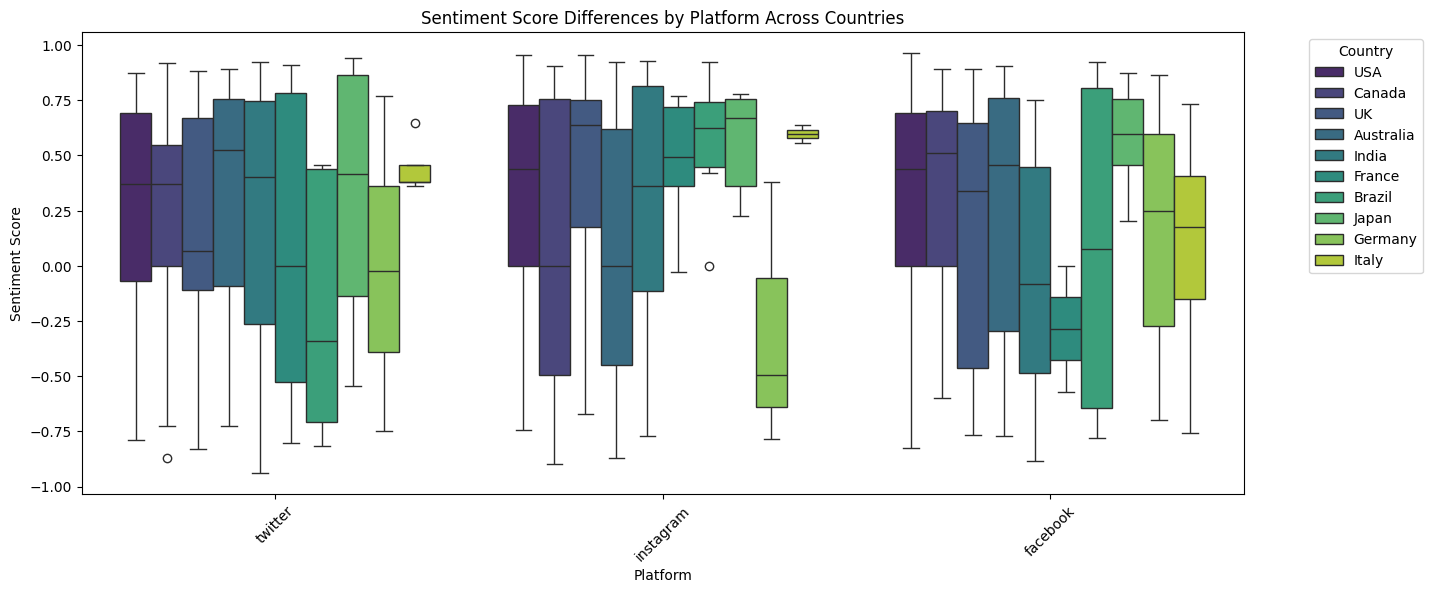

In [ ]:
plt.figure(figsize=(15, 6))

top_country_count = df['Country'].value_counts().head(10)

top_country_df = df[df['Country'].isin(top_country_count.index)]

sns.boxplot(x='Platform', y='Sentiment_Score', hue='Country', data=top_country_df, palette='viridis')

plt.xticks(rotation=45)
plt.title('Sentiment Score Differences by Platform Across Countries')
plt.ylabel('Sentiment Score')
plt.xlabel('Platform')
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
plt.show()